# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [1]:
from Scripts import helperfn as hf
from Scripts import downsample as ds
from Scripts import plotScripts as ps
from Scripts import pixelFinder as pf
from Scripts import clustering as cl
%load_ext autoreload
%autoreload 2

from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Load data

In [2]:
X = hf.get_data_noresults()
label_set = -1
Y = hf.get_results(label_set)
X_bal, Y_bal = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)
#X_data = hf.to_ewb(X)


## Use Principle Component Analysis to aid plotting on a scatter graph

In [3]:
pca = PCA(2)
x_pca = pca.fit_transform(X)


## Compute KMeans using EM algorithm

In [4]:
pca_kmeans = KMeans(n_clusters=10, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_pca)

In [5]:
YY = Y.reset_index(drop=True)

#### View how many of each class are assigned to a given cluster

In [6]:
cluster = cl.cluster_num_elements_to_dict(pca_kmeans, YY, verbose=True)

cluster- 0 classes:-  Counter({1: 462, 2: 146, 8: 106, 0: 96, 4: 62, 3: 36, 5: 22, 9: 17, 7: 13, 6: 5})
cluster- 1 classes:-  Counter({2: 460, 1: 326, 4: 309, 7: 113, 8: 53, 3: 48, 5: 34, 9: 14, 0: 12, 6: 4})
cluster- 2 classes:-  Counter({3: 152, 1: 91, 2: 51, 9: 33, 8: 32, 6: 25, 0: 9, 4: 7, 5: 1})
cluster- 3 classes:-  Counter({1: 267, 2: 204, 4: 174, 3: 127, 9: 52, 7: 39, 0: 34, 6: 27, 8: 19, 5: 12})
cluster- 4 classes:-  Counter({2: 209, 1: 165, 4: 131, 0: 2})
cluster- 5 classes:-  Counter({1: 189, 8: 82, 2: 54, 4: 51, 0: 24, 9: 12, 3: 9, 5: 4})
cluster- 6 classes:-  Counter({3: 203, 2: 124, 4: 64, 1: 56, 6: 34, 7: 15, 9: 12, 0: 10, 8: 3})
cluster- 7 classes:-  Counter({4: 660, 3: 446, 2: 184, 6: 153, 1: 90, 8: 82, 5: 30, 7: 21, 9: 2})
cluster- 8 classes:-  Counter({2: 298, 1: 226, 4: 184, 5: 25, 8: 25, 0: 21, 7: 2})
cluster- 9 classes:-  Counter({2: 520, 3: 389, 1: 348, 4: 338, 8: 138, 9: 128, 6: 112, 5: 82, 7: 37, 0: 2})


In [7]:
pca_with_labels = hf.append_result_col(pd.DataFrame(x_pca), YY)

## Plot the clusters & the true labels for a visual comparison of the clusters effectiveness

#### Observation
- This has poorly seperated the classes, it is likely other preproccessing techniques or alternative parameters will be required.
- As seen in the 'Class true labels' figure the classes are not divided locally in the x and y axis
- We can clearly see that this is the cause of the failure of the algorithm to perform effective clustering

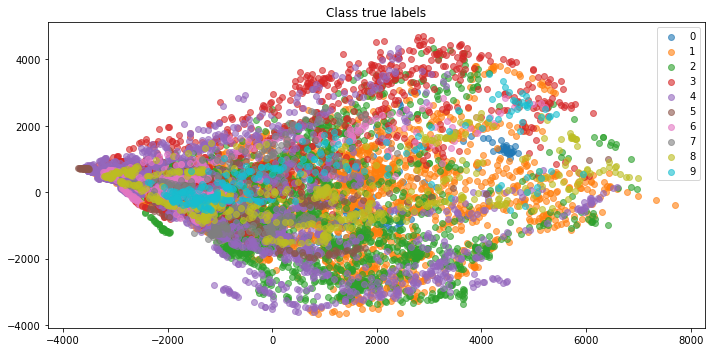

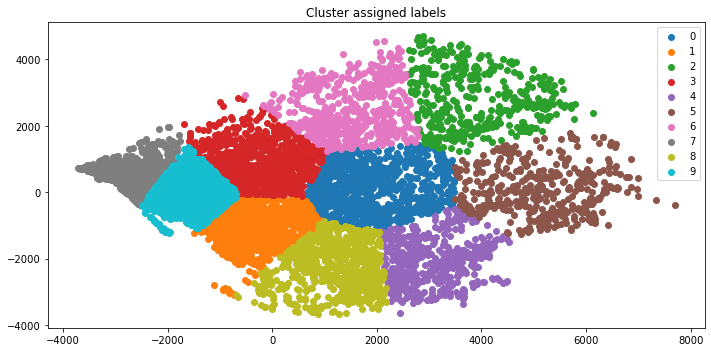

In [8]:
ps.scatter_clusters_by_class(pca_kmeans, pca_with_labels)
ps.scatter_clusters(pca_kmeans, pca_with_labels, YY)

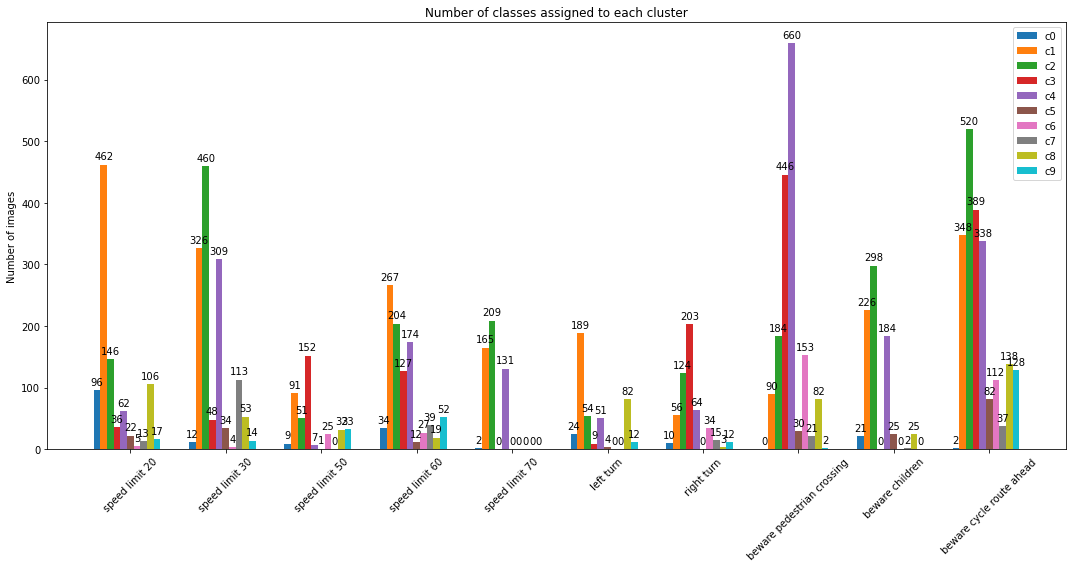

In [9]:
arr = cl.prepare_cluster_to_plot(cluster, YY)
ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

### Modifying the Principle Component Analysis parameter
#### No real improvement is observed

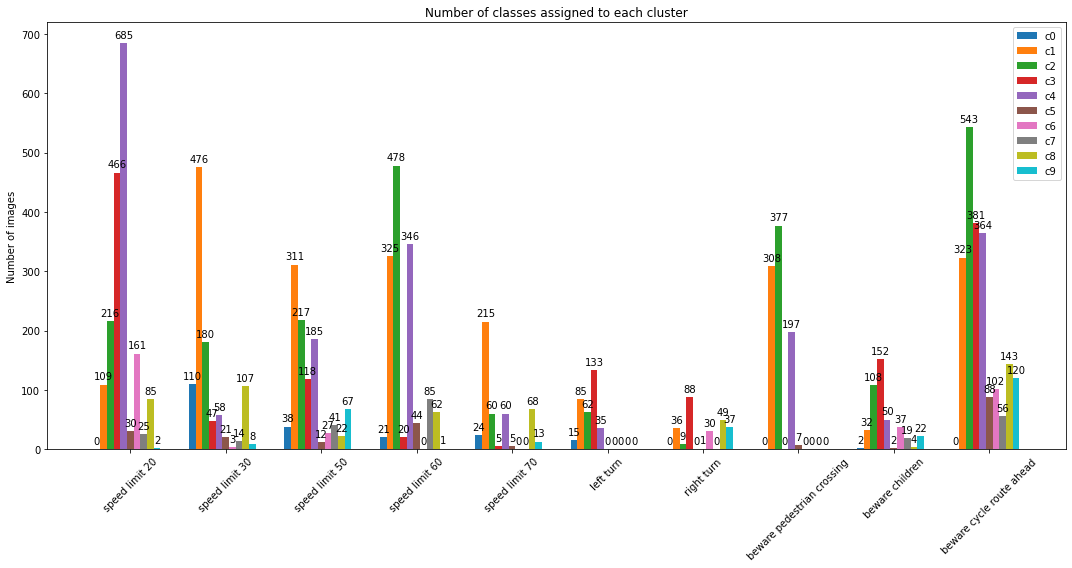

In [10]:
pca200 = PCA(200)
x_pca200 = pca200.fit_transform(X)
pca_kmeans = KMeans(n_clusters=10, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_pca200)
cluster = cl.cluster_num_elements_to_dict(pca_kmeans, YY, verbose=False)
arr = cl.prepare_cluster_to_plot(cluster, YY)
ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

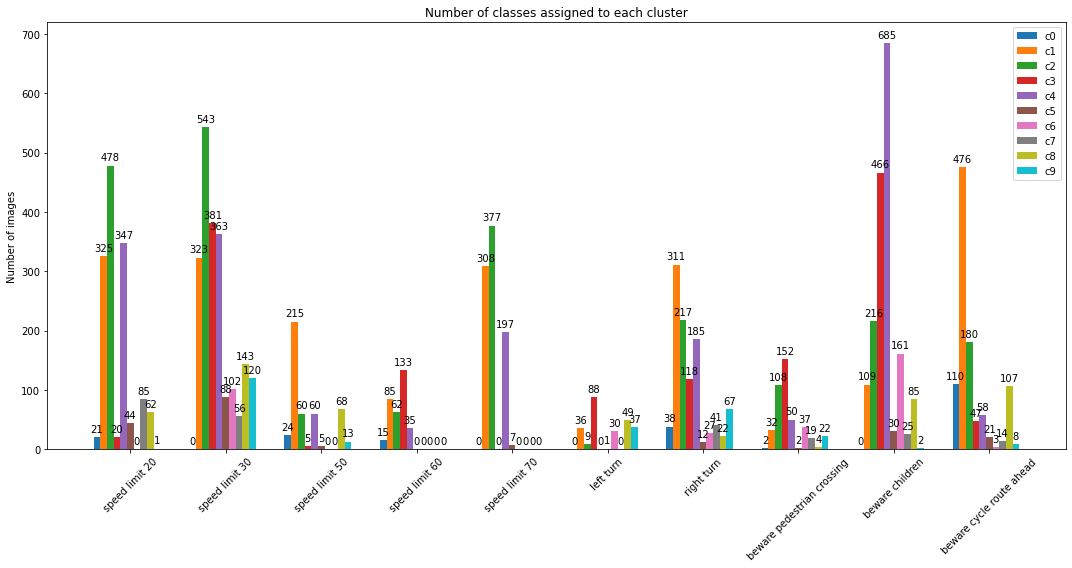

In [11]:
pca500 = PCA(500)
x_pca500 = pca500.fit_transform(X)
pca_kmeans = KMeans(n_clusters=10, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_pca500)
cluster = cl.cluster_num_elements_to_dict(pca_kmeans, YY, verbose=False)
arr = cl.prepare_cluster_to_plot(cluster, YY)
ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

## Trying Clustering with a smaller dataset
### Balancing the class distribution and using PCA

In [12]:
X = hf.get_data_noresults()
label_set = 5
Y = hf.get_results(label_set)
X_bal, Y_bal = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

In [13]:
turn_left = PCA(2)
x_turn_left = turn_left.fit_transform(X_bal)
turn_left_kmeans = KMeans(n_clusters=2, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(x_turn_left)
cluster = cl.cluster_num_elements_to_dict(turn_left_kmeans, Y_bal, verbose=True)

cluster- 0 classes:-  Counter({0: 145, 1: 132})
cluster- 1 classes:-  Counter({1: 78, 0: 65})


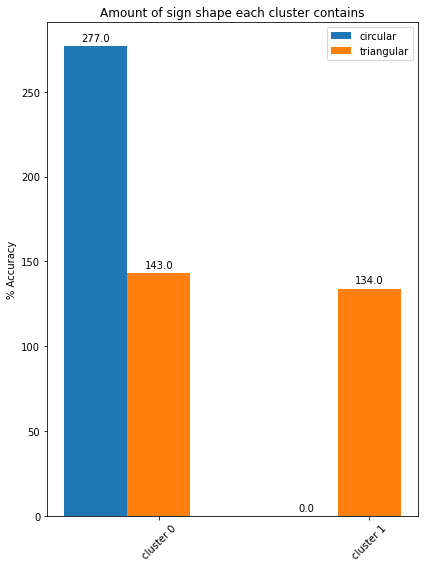

In [14]:
sign = cl.check_shape(cluster)
ps.plot_scores(sign, ["circular", "triangular"], title="Amount of sign shape each cluster contains", labels=["cluster 0", "cluster 1"], bar_width=0.3, figure_size=(6, 8))

In [15]:
YB = Y_bal.reset_index(drop=True)
tl_with_labels = hf.append_result_col(pd.DataFrame(x_turn_left), YB)

### Still performing poorly
#### Something needs to be done to the data

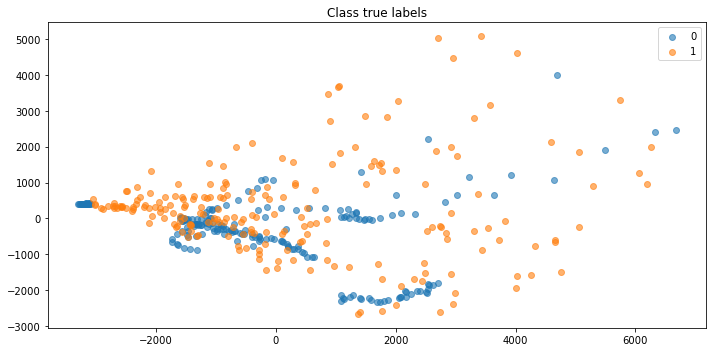

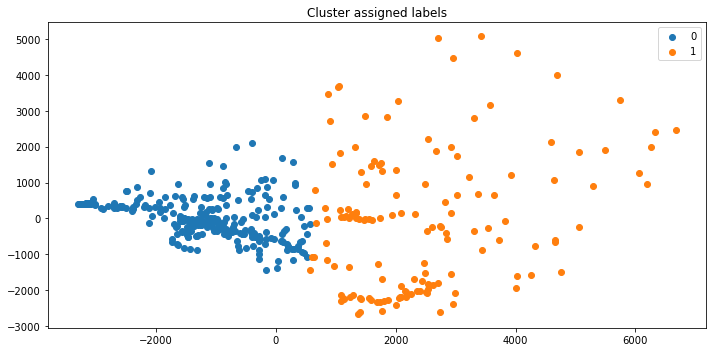

In [16]:

ps.scatter_clusters_by_class(turn_left_kmeans, tl_with_labels, legend=(0, 2))
ps.scatter_clusters(turn_left_kmeans, tl_with_labels, Y_bal)

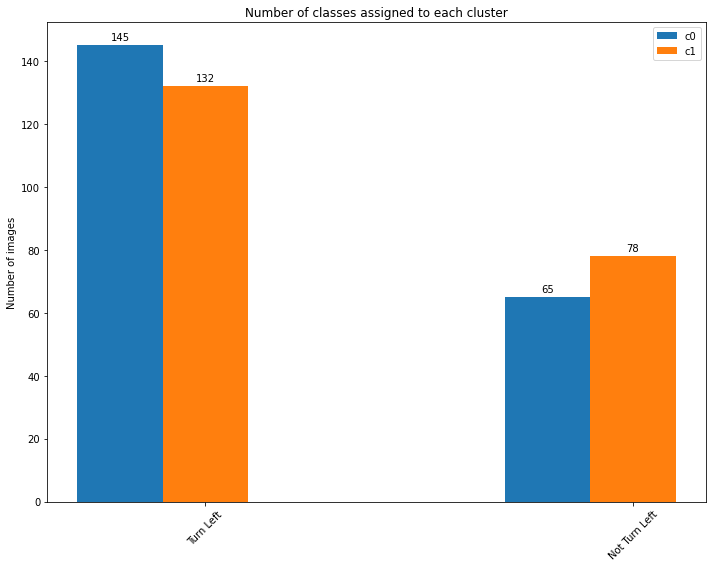

In [17]:
arr = cl.prepare_cluster_to_plot(cluster, Y_bal)
ps.plot_scores(arr, ["c0", "c1"], title="Number of classes assigned to each cluster", labels=['Turn Left', 'Not Turn Left'], bar_width=0.2, figure_size=(10, 8), y_label='Number of images')

In [18]:
# Fix for GPU issue
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print("Err: ", e)

In [19]:
def tri_channel_image(image):
    d = int(round(math.sqrt(image.shape[0]), 0))
    image = image.reshape(d, d)
    image = np.stack((image,)*3, axis=-1)
    return image

def extract_vector(images):
    vgg16_feature_list = []

    for im in images:
        resnet_feature = base_model.predict(img)
        resnet_feature_np = np.array(resnet_feature)
        resnet_feature_list.append(resnet_feature_np.flatten())

    return np.array(resnet_feature_list)

## Using transfer learning to extract feature vectors
### Import an CNN model

In [20]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(48, 48, 3),
    include_top=False)

base_model.trainable = False
base_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .001), loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

#### Model requires 3 channel data, for convienience stack greyscale values on all 3 channels

In [21]:
three_dimensions = np.apply_along_axis(tri_channel_image, 1, X_bal)
three_dimensions.shape

(420, 48, 48, 3)

### Extract feature vectors from VGG16 convolutional & pooling layers

In [22]:
features = base_model.predict(three_dimensions)

In [23]:
flat_features = []
for vec in features:
    flat_features.append(vec.flatten())

In [24]:
pca = PCA(2)
features_pca = pca.fit_transform(flat_features)

In [25]:
feature_pca_kmeans = KMeans(n_clusters=2, n_init=300, max_iter=1000, random_state=21, algorithm='full').fit_predict(features_pca)

### Much better clustering result, we have a clear distinction between the classes in the clusters

In [26]:
cluster = cl.cluster_num_elements_to_dict(feature_pca_kmeans, Y_bal, verbose=True)

cluster- 0 classes:-  Counter({0: 210, 1: 89})
cluster- 1 classes:-  Counter({1: 121})


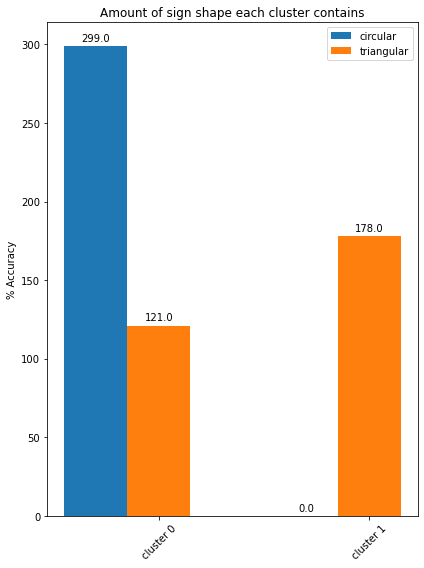

In [27]:
sign = cl.check_shape(cluster)
ps.plot_scores(sign, ["circular", "triangular"], title="Amount of sign shape each cluster contains", labels=["cluster 0", "cluster 1"], bar_width=0.3, figure_size=(6, 8))

In [28]:
YP = Y_bal.reset_index(drop=True)
tl_with_labels = hf.append_result_col(pd.DataFrame(features_pca), YP)

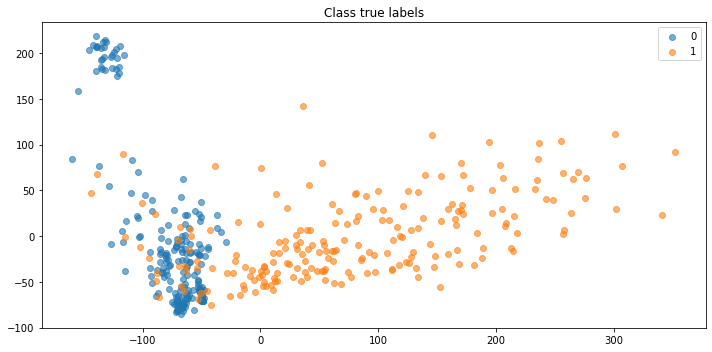

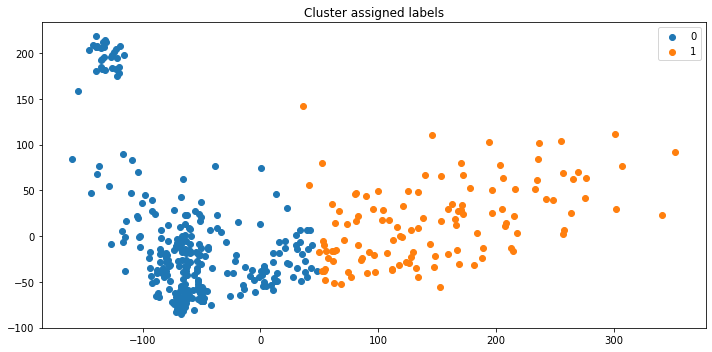

In [29]:
ps.scatter_clusters_by_class(feature_pca_kmeans, tl_with_labels, legend=(0, 2))
ps.scatter_clusters(feature_pca_kmeans, tl_with_labels, Y_bal)

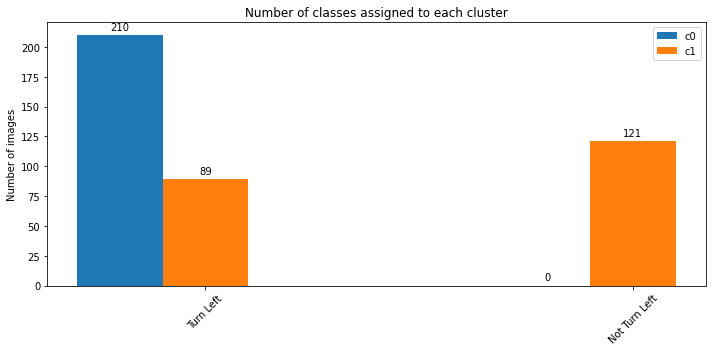

In [30]:
#vgg16_vec = hf.append_result_col(pd.DataFrame(x_pca), Y)
arr = cl.prepare_cluster_to_plot(cluster, Y_bal)
#ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')
ps.plot_scores(arr, ["c0", "c1"], title="Number of classes assigned to each cluster", labels=['Turn Left', 'Not Turn Left'], bar_width=0.2, figure_size=(10, 5), y_label='Number of images')

## Try Transfer learning with a different result set

In [44]:
X = hf.get_data_noresults()
label_set = 6
Y = hf.get_results(label_set)
X_bal, Y_bal = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

In [45]:
three_dimensions = np.apply_along_axis(tri_channel_image, 1, X_bal)
features = base_model.predict(three_dimensions)
flat_features = []
for vec in features:
    flat_features.append(vec.flatten())

pca = PCA(10)
features_pca = pca.fit_transform(flat_features)

feature_pca_kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100, random_state=3, algorithm='auto').fit_predict(features_pca)
cluster = cl.cluster_num_elements_to_dict(feature_pca_kmeans, Y_bal, verbose=True)

cluster- 0 classes:-  Counter({0: 360, 1: 132})
cluster- 1 classes:-  Counter({1: 228})


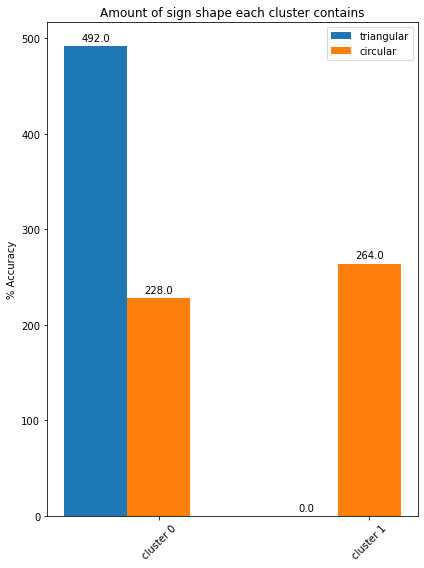

In [94]:
sign = cl.check_shape(cluster)
ps.plot_scores(sign, ["triangular", "circular"], title="Amount of sign shape each cluster contains", labels=["cluster 0", "cluster 1"], bar_width=0.3, figure_size=(6, 8))

In [56]:
cluster_0_indices = cl.ClusterIndicesNumpy(0, feature_pca_kmeans)
cluster_1_indices = cl.ClusterIndicesNumpy(1, feature_pca_kmeans)
cluster_0 = X_bal.to_numpy()[cluster_0_indices]
cluster_1 = X_bal.to_numpy()[cluster_1_indices]

(492, 2304)
(228, 2304)


### Cluster 0
#### Mostly triangular signs

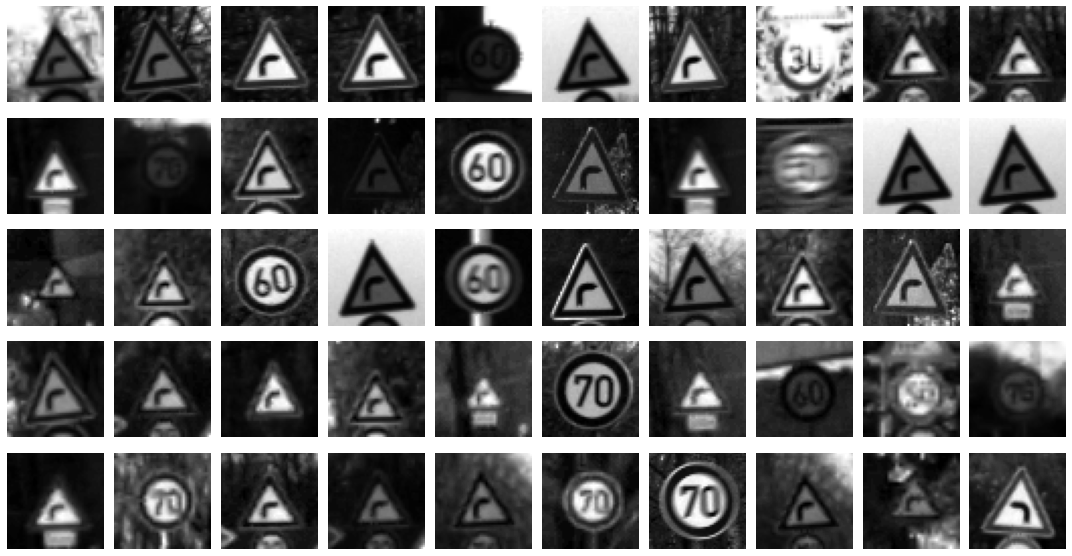

In [93]:
ps.plot_images(cluster_0, n=50, rows=5)

### Cluster 1
#### Entirely circular signs


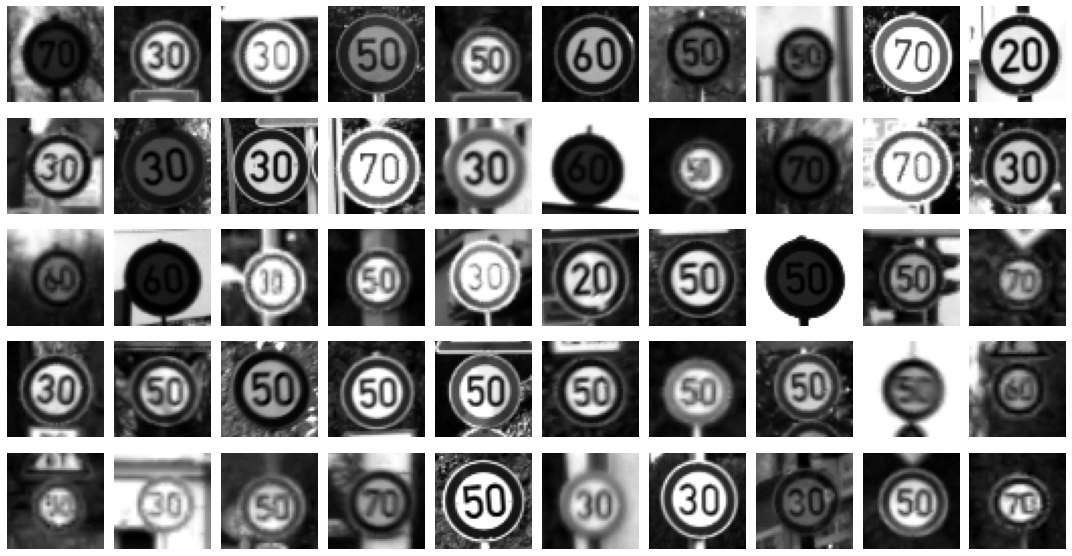

In [92]:
ps.plot_images(cluster_1, n=50, rows=5)

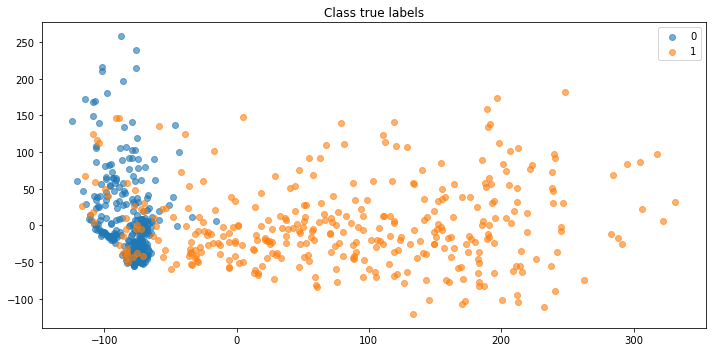

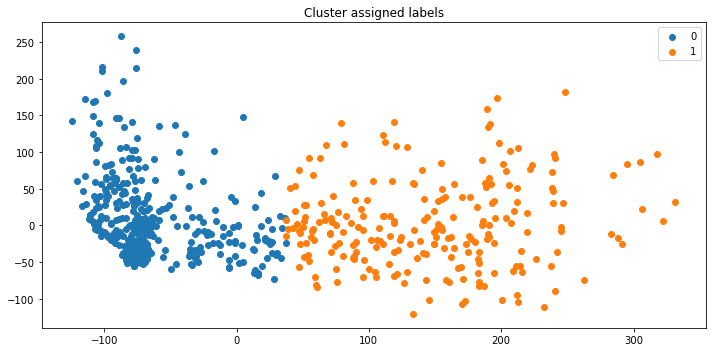

In [47]:
YP = Y_bal.reset_index(drop=True)
tl_with_labels = hf.append_result_col(pd.DataFrame(features_pca), YP)
ps.scatter_clusters_by_class(feature_pca_kmeans, tl_with_labels, legend=(0, 2))
ps.scatter_clusters(feature_pca_kmeans, tl_with_labels, Y_bal)

### Very similar result

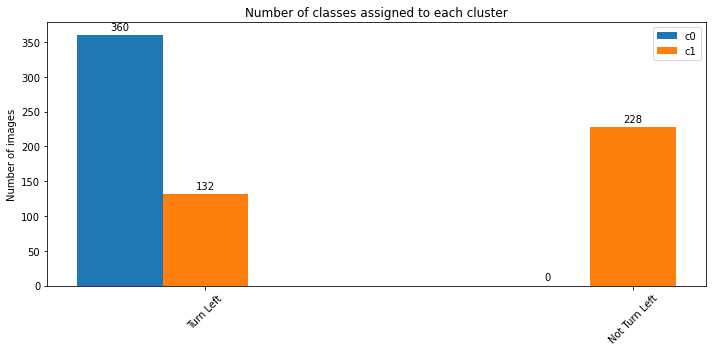

In [36]:
#vgg16_vec = hf.append_result_col(pd.DataFrame(x_pca), Y)
arr = cl.prepare_cluster_to_plot(cluster, Y_bal)
#ps.plot_scores(arr, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')
ps.plot_scores(arr, ["c0", "c1"], title="Number of classes assigned to each cluster", labels=['Turn Left', 'Not Turn Left'], bar_width=0.2, figure_size=(10, 5), y_label='Number of images')

## Transfer learning with all labels in dataset

In [37]:
X = hf.get_data_noresults()
label_set = -1
Y = hf.get_results(label_set)
X_bal, Y_bal = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

In [38]:
three_dimensions = np.apply_along_axis(tri_channel_image, 1, X_bal)
features = base_model.predict(three_dimensions)
flat_features = []
for vec in features:
    flat_features.append(vec.flatten())

pca = PCA(10)
features_pca = pca.fit_transform(flat_features)

feature_pca_kmeans = KMeans(n_clusters=10, n_init=20, max_iter=500, random_state=3, algorithm='auto').fit_predict(features_pca)
cluster = cl.cluster_num_elements_to_dict(feature_pca_kmeans, Y_bal, verbose=True)

cluster- 0 classes:-  Counter({6: 125, 3: 119, 4: 81, 5: 58, 8: 38, 2: 37, 9: 37, 1: 34, 7: 23, 0: 1})
cluster- 1 classes:-  Counter({0: 42, 1: 23, 2: 17, 3: 6, 4: 5})
cluster- 2 classes:-  Counter({5: 40, 6: 24, 8: 22, 9: 19, 7: 17, 1: 2, 3: 1})
cluster- 3 classes:-  Counter({0: 49, 2: 45, 1: 38, 4: 36, 3: 7})
cluster- 4 classes:-  Counter({7: 126, 9: 96, 5: 92, 8: 75, 6: 19})
cluster- 5 classes:-  Counter({2: 90, 4: 69, 1: 60, 3: 30, 0: 21})
cluster- 6 classes:-  Counter({9: 39, 6: 38, 7: 22, 8: 19, 5: 12, 3: 8})
cluster- 7 classes:-  Counter({3: 33, 4: 11, 2: 10, 1: 7, 0: 5})
cluster- 8 classes:-  Counter({0: 92, 1: 46, 2: 11, 4: 8, 3: 6})
cluster- 9 classes:-  Counter({8: 56, 7: 22, 9: 19, 5: 8, 6: 4})


### While clustering benefits from using a feature vector it needs very clear distinctions in the data for each class

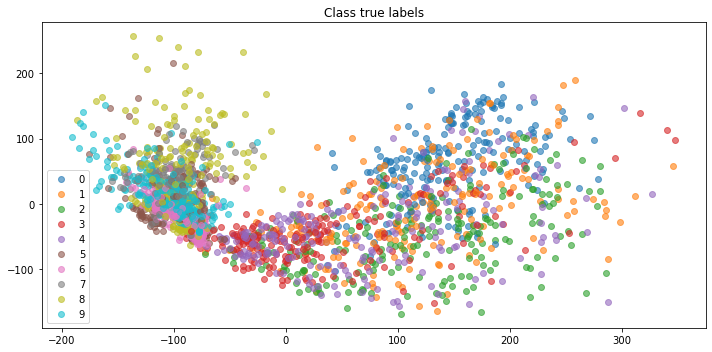

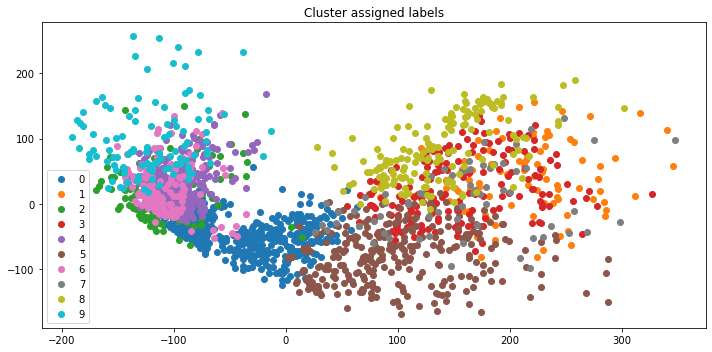

In [39]:
YP = Y_bal.reset_index(drop=True)
tl_with_labels = hf.append_result_col(pd.DataFrame(features_pca), YP)
ps.scatter_clusters_by_class(feature_pca_kmeans, tl_with_labels)
ps.scatter_clusters(feature_pca_kmeans, tl_with_labels, Y_bal)

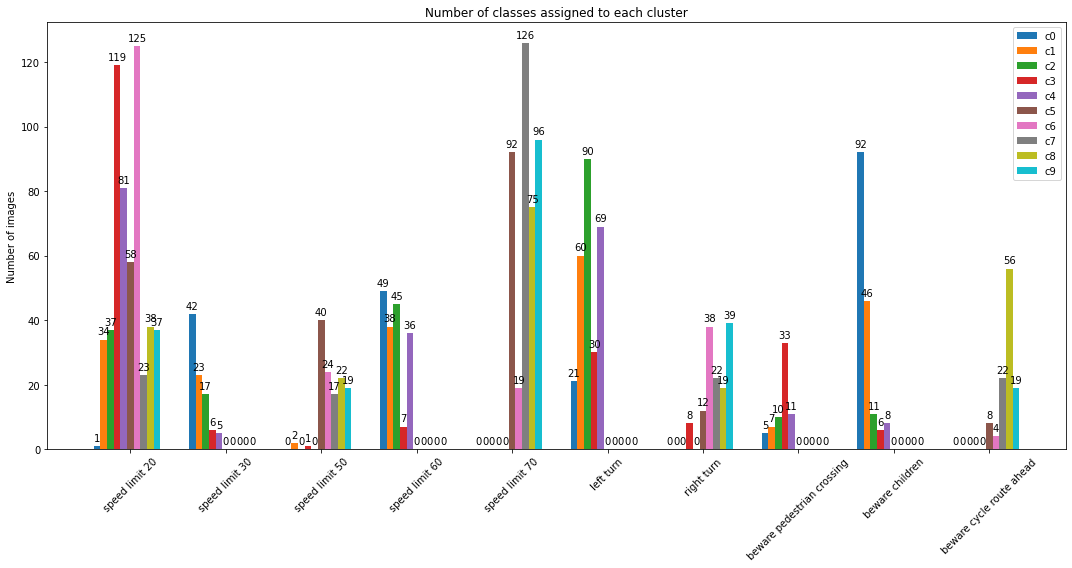

In [40]:
arr = cl.prepare_cluster_to_plot(cluster, Y_bal)
ps.plot_scores(arr,  ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes assigned to each cluster", labels=ps.g_labels[1:], bar_width=0.07, figure_size=(15, 8), y_label='Number of images')

In [41]:
# Clear GPU memory
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)